In [47]:
# necessary Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv("/Users/himkantnigam/Downloads/Advertising.csv")

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


What are the features?

TV: Advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
Radio: Advertising dollars spent on Radio
Newspaper: Advertising dollars spent on Newspaper
What is the response?

Sales: sales of a single product in a given market (in thousands of widgets)

In [4]:
#checking the shape of data
data.shape

(200, 5)

In [5]:
#checking for null values and data type of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
#checking count of missing values
data.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [18]:
#descriptive stats of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


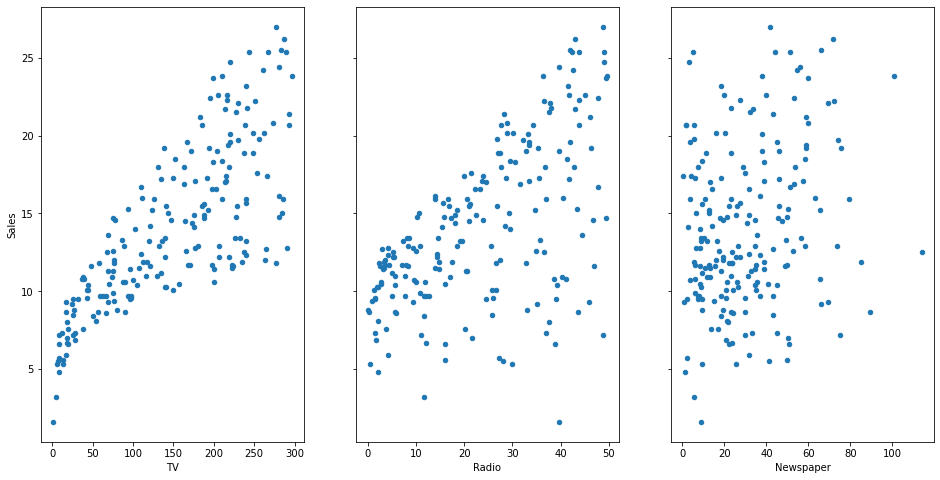

In [7]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])
plt.show()

#### From the relationship diagrams above, it can be observed that there seems to be a linear relationship between the features TV and Sales. Radio and sales is also almost a linear one.

In [8]:
#dropping unnecessary columns
data.drop(columns=["Unnamed: 0"],inplace=True)

In [9]:
#checking if unnamed column is removed or not
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

#### Questions about the data

A generic question shall be: How the company should optimise the spends on advertising to maximise the sales?

These general questions might lead you to more specific questions:

- What’s the relationship between ads and sales?
- How prominent is that relationship?
- Which ad types contribute to sales?
- How each ad contributes to sales?
- Can sales be predicted based on the expense of the advertisement?


In [11]:
# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

7.0325935491276965
[0.04753664]


#### Interpreting the model

How do we interpret the coefficient for spends on TV ad (β1)?

A "unit" increase in spends on a TV ad is associated with a 0.047537 "unit" increase in Sales.
Or, an additional $1,000 on TV ads is translated to an increase in sales by 47.53 Dollars.

As an increase in TV ad expenditure is associated with a decrease in sales, β1 would be negative.

In [13]:
#Prediction using the model

#If the expense on TV ad is $50000, what will be the sales 
#prediction for that market?

7.0325935491276965 + 0.04753664 * 50

9.409425549127697

#### Thus we should predict sales of 9409 widgets in that market.

In [14]:
#  Let's create a DataFrame for the same
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [15]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([9.40942557])

In [28]:
# create a DataFrame with the minimum and maximum values of TV
X_new2 = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new2.head()

,TV
0,0.7
1,296.4


In [20]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([ 7.0658692 , 21.12245377])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


InvalidIndexError: (slice(None, None, None), None)

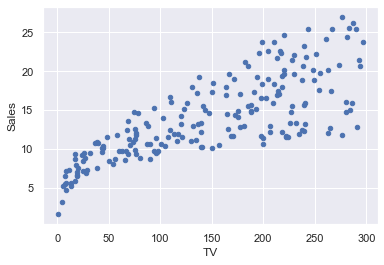

In [31]:
# plotting the observed data
data.plot(kind='scatter', x='TV', y='Sales')

# plotting the least squares line
plt.plot(X_new2, preds, color='red', linewidth=2)

### Hypothesis Testing and p-values

#### Null hypothesis: No relationship exists between TV advertisements and Sales (and hence β1 equals zero).

#### Alternative hypothesis: There exists a relationship between TV advertisements and Sales (and hence, β1 is not equal to zero).

#### The p-value represents the probability of the coefficient actually being zero.

In [34]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ TV', data=data).fit()
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [35]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

#### since p value < 0.05 : we can say that there is a relationship between TV advertisements and sales.

### How Well Does the Model Fit the data?

In [38]:
# print the R-squared value for the model
lm.rsquared

0.611875050850071

the domain to which the data belongs to plays a significant role in deciding the threshold for the R-squared value. Therefore, it's a tool for comparing different models.

## Multiple Linear Regression

In [40]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


#### If we look at the coefficients, the coefficient for the newspaper spends is negative. It means that the money spent for newspaper advertisements is not contributing in a positive way to the sales.

In [42]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 22 Jun 2022   Prob (F-statistic):           1.58e-96
Time:                        01:41:06   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- TV and Radio have positive p-values, whereas Newspaper has a negative one. Hence, we can reject the null hypothesis for TV and Radio that there is no relation between those features and Sales, but we fail to reject the null hypothesis for Newspaper that there is no relationship between newspaper spends and sales.

- The expenses on bot TV and Radio ads are positively associated with Sales, whereas the expense on newspaper ad is slightly negatively associated with the Sales.

- This model has a higher value of R-squared (0.897) than the previous model, which means that this model explains more variance and provides a better fit to the data than a model that only includes the TV.

### Feature Selection

In [44]:
# only include TV and Radio in the model
lm = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
lm.rsquared

0.8971942610828957

In [45]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.rsquared

0.8972106381789522

here we can see that on adding new feature R square adjusted value has not increased that significantly, hence we can say that on the basis of adjusted r square that newspaper is not of much significance.

In [48]:
#We’ll create a new feature called Scale and shall randomly 
#assign observations as small or large:

# set a seed for reproducibility
np.random.seed(786)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Scale'] = 'small'
data.loc[mask_large, 'Scale'] = 'large'
data.head()

,TV,Radio,Newspaper,Sales,Scale
0,230.1,37.8,69.2,22.1,large
1,44.5,39.3,45.1,10.4,small
2,17.2,45.9,69.3,9.3,large
3,151.5,41.3,58.5,18.5,small
4,180.8,10.8,58.4,12.9,large


In [49]:
# create a new Series called IsLarge
data['Scale_num'] = data.Scale.map({'small':0, 'large':1})
data.head()

,TV,Radio,Newspaper,Sales,Scale,Scale_num
0,230.1,37.8,69.2,22.1,large,1
1,44.5,39.3,45.1,10.4,small,0
2,17.2,45.9,69.3,9.3,large,1
3,151.5,41.3,58.5,18.5,small,0
4,180.8,10.8,58.4,12.9,large,1


In [50]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'Scale_num']
X = data[feature_cols]
y = data.Sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
i=0
for col in feature_cols:
    print('The Coefficient of ',col, ' is: ',lm.coef_[i])
    i=i+1

The Coefficient of  TV  is:  0.04588886647046828
The Coefficient of  Radio  is:  0.18949808706745558
The Coefficient of  Newspaper  is:  -0.0011080339520417315
The Coefficient of  Scale_num  is:  0.29263500625441563


#### For a given TV/Radio/Newspaper ad expenditure if the average sales increases by 292.63 widgets, it’s considered as a large market.

In [52]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Targeted Geography'] = 'rural'
data.loc[mask_suburban, 'Targeted Geography'] = 'suburban'
data.loc[mask_urban, 'Targeted Geography'] = 'urban'
data.head()

,TV,Radio,Newspaper,Sales,Scale,Scale_num,Targeted Geography
0,230.1,37.8,69.2,22.1,large,1,rural
1,44.5,39.3,45.1,10.4,small,0,urban
2,17.2,45.9,69.3,9.3,large,1,rural
3,151.5,41.3,58.5,18.5,small,0,urban
4,180.8,10.8,58.4,12.9,large,1,suburban


In [53]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data['Targeted Geography'], prefix='Targeted Geography').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,Radio,Newspaper,Sales,Scale,Scale_num,Targeted Geography,Targeted Geography_suburban,Targeted Geography_urban
0,230.1,37.8,69.2,22.1,large,1,rural,0,0
1,44.5,39.3,45.1,10.4,small,0,urban,0,1
2,17.2,45.9,69.3,9.3,large,1,rural,0,0
3,151.5,41.3,58.5,18.5,small,0,urban,0,1
4,180.8,10.8,58.4,12.9,large,1,suburban,1,0


In [55]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'Scale_num', 'Targeted Geography_suburban', 'Targeted Geography_urban']
X = data[feature_cols]
y = data.Sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
print(feature_cols)
print(lm.coef_)

['TV', 'Radio', 'Newspaper', 'Scale_num', 'Targeted Geography_suburban', 'Targeted Geography_urban']
[ 0.04593945  0.1886111  -0.0011117   0.32157528 -0.14802339  0.2574346 ]


If all other columns are constant, the suburban geography is associated with an average DECREASE of 106.56 widgets in sales for $1000 spent.

if $1000 is spent in an urban geography, it amounts to an average INCREASE in Sales of 268.13 widgets

In [57]:
data.drop(columns=['Scale','Targeted Geography'],inplace=True)
data.head()

,TV,Radio,Newspaper,Sales,Scale_num,Targeted Geography_suburban,Targeted Geography_urban
0,230.1,37.8,69.2,22.1,1,0,0
1,44.5,39.3,45.1,10.4,0,0,1
2,17.2,45.9,69.3,9.3,1,0,0
3,151.5,41.3,58.5,18.5,0,0,1
4,180.8,10.8,58.4,12.9,1,1,0


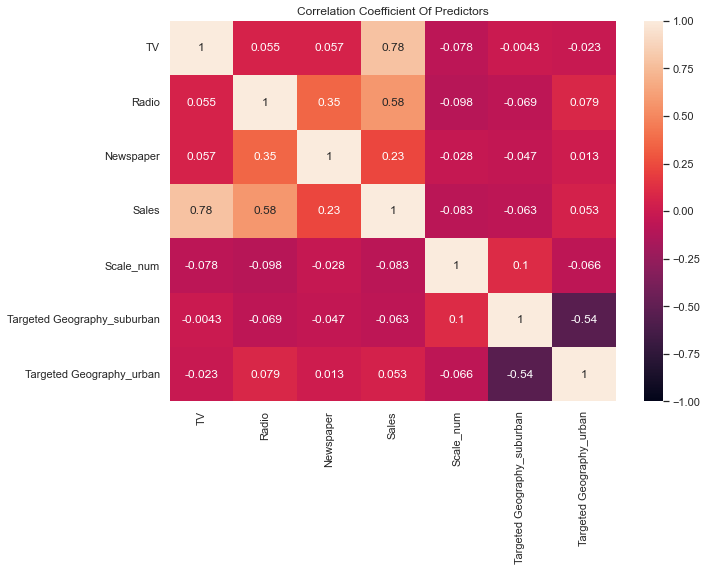

In [63]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

- here we can see that radio has high correlation with newspaper and sales and similarly we can see for newspaper

- sales have high correlation with all the mediums of advertisement in our dataset which are TV, Radio and Newspaper.

#### we can either remove features with the help of VIF or adjusted R2 value.

##### ---------------------first we will see with the VIF score

In [68]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = data[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [69]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales', 'Scale_num',
       'Targeted Geography_suburban', 'Targeted Geography_urban'],
      dtype='object')

In [70]:
# features to consider removing
considered_features = ['TV', 'Radio', 'Newspaper', 'Sales', 'Scale_num',
       'Targeted Geography_suburban', 'Targeted Geography_urban']


# compute vif 
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
3,Sales,9.904689
0,TV,6.671153
1,Radio,4.014375
5,Targeted Geography_suburban,1.430857
6,Targeted Geography_urban,1.428449
2,Newspaper,1.147509
4,Scale_num,1.034624


In [71]:
# compute vif values after removing a feature
considered_features.remove('TV')
compute_vif(considered_features)

,Variable,VIF
0,Radio,1.635804
1,Newspaper,1.146612
2,Sales,1.501228
3,Scale_num,1.020586
4,Targeted Geography_suburban,1.429631
5,Targeted Geography_urban,1.421760


- Now that the variance inflation factors are all within the acceptable range, the derived model will be more likely to yield statistically significant results.

##### ------------------------now lets see through adjusted R2 value.

In [72]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [77]:
# create X and y
feature_cols = ['Radio', 'Newspaper', 'Scale_num','Targeted Geography_suburban','Targeted Geography_urban']
X = data[feature_cols]
y = data.Sales

In [76]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)

In [78]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [80]:
regression.score(x_train,y_train)

0.30773974055435827

In [81]:
adj_r2(x_train,y_train)


0.2852637581048244

In [82]:
regression.score(x_test,y_test)


0.3220608479784881

In [83]:
adj_r2(x_test,y_test)


0.2223639138576775

In [84]:
X

,Radio,Newspaper,Scale_num,Targeted Geography_suburban,Targeted Geography_urban
0,37.8,69.2,1,0,0
1,39.3,45.1,0,0,1
2,45.9,69.3,1,0,0
3,41.3,58.5,0,0,1
4,10.8,58.4,1,1,0
...,...,...,...,...,...
195,3.7,13.8,1,1,0
196,4.9,8.1,1,0,1
197,9.3,6.4,1,1,0
198,42.0,66.2,1,0,0


In [96]:
from sklearn.preprocessing import StandardScaler 
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.20)
regression2 = LinearRegression()
regression2.fit(x_train,y_train)

LinearRegression()

In [97]:
regression.score(x_train,y_train),adj_r2(x_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(-0.821254726615334, -0.8803863735833644)

In [98]:
regression.score(x_test,y_test),adj_r2(x_test,y_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(-0.5140298899165943, -0.7366813443160936)